# KNN基础

> KNN,K-Nearest Neighbors 算法的中文名叫K近邻算法，KNN算法的思想非常简单，应用的数学知识简直没有，但是效果却出奇的好，接下来，来一起看看这个算法长什么样子

#### 图解
![title](img/isea1.png)

#### 算法思想

>这里肿瘤大小+时间都是特征，颜色是标签，如果新来了一个蓝色的肿瘤，我们如何判断该肿瘤是良性还是恶性？这里计算蓝色的点和所有的点的距离大小，然后排序，取出距离最近的K个点，最近的K个点的标签，进行投票，来决定新进来的肿瘤是良性还是恶性。


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
row_data_X = [[3.390902,2.339098],
              [3.110987,2.799093],
              [1.345243,3.455634],
              [3.434645,4.980835],
              [2.984534,2.385423],
              [6.923839,5.323263],
              [5.979824,5.504965],
              [8.098498,5.098667],
              [7.892098,0.983723],
              [9.084339,5.987982]
             ]
row_data_y = [0,0,0,0,0,1,1,1,1,1]

In [6]:
X_train = np.array(row_data_X)
y_train = np.array(row_data_y)

In [7]:
X_train

array([[3.390902, 2.339098],
       [3.110987, 2.799093],
       [1.345243, 3.455634],
       [3.434645, 4.980835],
       [2.984534, 2.385423],
       [6.923839, 5.323263],
       [5.979824, 5.504965],
       [8.098498, 5.098667],
       [7.892098, 0.983723],
       [9.084339, 5.987982]])

In [8]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

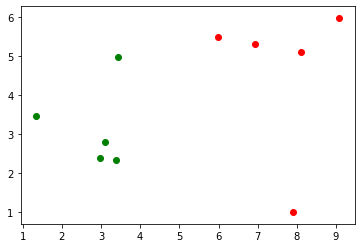

In [9]:
# 散点图的绘制
plt.scatter(X_train[y_train == 0,0],X_train[y_train == 0,1],color = 'g')
plt.scatter(X_train[y_train == 1,0],X_train[y_train == 1,1],color = 'r')
plt.show()

In [10]:
x = np.array([8.093,4.345])

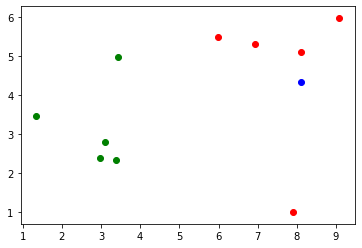

In [11]:

plt.scatter(X_train[y_train == 0,0],X_train[y_train == 0,1],color = 'g')
plt.scatter(X_train[y_train == 1,0],X_train[y_train == 1,1],color = 'r')
plt.scatter(x[0],x[1],color = 'b')
plt.show()

### KNN的过程

使用 **欧拉距离** 作为距离的计算公式
![欧拉公式](img/isea2.png)

In [12]:
from math import sqrt
distances = []
for x_train in X_train:
    d = sqrt(np.sum((x_train - x) ** 2))
    distances.append(d)
distances

[5.112080636610498,
 5.216347571320186,
 6.806114634136351,
 4.701548410178289,
 5.4714136100358015,
 1.5244461096050592,
 2.4106081407398015,
 0.753687053685414,
 3.3672755581230653,
 1.9188910509054442]

In [13]:
# 或者直接使用python中的生成表达式来实现
distances = [sqrt(np.sum((x_train - x) ** 2)) for x_train in X_train]
distances

[5.112080636610498,
 5.216347571320186,
 6.806114634136351,
 4.701548410178289,
 5.4714136100358015,
 1.5244461096050592,
 2.4106081407398015,
 0.753687053685414,
 3.3672755581230653,
 1.9188910509054442]

In [14]:
# argsort 对数组中的数据进行排序，但是返回的是排序结果的索引值
np.argsort(distances)

array([7, 5, 9, 6, 8, 3, 0, 1, 4, 2], dtype=int64)

In [15]:
nearest = np.argsort(distances)
nearest

array([7, 5, 9, 6, 8, 3, 0, 1, 4, 2], dtype=int64)

In [16]:
k = 6
# 最近的K个点的y坐标
topK_y = [y_train[i] for i in nearest[:k]]

In [17]:
# 使用counter，来将数组中的元素和该元素出现的次数，做一个K,V映射
from collections import Counter
Counter(topK_y)

Counter({1: 5, 0: 1})

In [18]:
votes = Counter(topK_y)
votes

Counter({1: 5, 0: 1})

In [19]:
votes.most_common(1)

[(1, 5)]

In [20]:
votes.most_common(1)[0][0]

1

> 这里的结果是1，表示预测是恶性肿瘤

## 重新认识机器学习

#### 如下图：
![Machine Learning](img/isea3.png)

>一般而言，我们需要就训练数据集作为机器学习算法的输入，以此来训练处一个模型；然后我们在往这个模型中输入样例，就可以得到预测值。
fit：训练，拟合

但是KNN算法有一个特点是：KNN并不需要训练过程，有可以理解为模型不需要训练得到，训练数据集本身就是模型，sklearn这个机器学习库，就是如此封装KNN算法的。

### 使用scikit-learn中的KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier # 这个类中包装了KNN算法

In [22]:
# 获取KNN实例
kNN_classfier = KNeighborsClassifier(n_neighbors = 6)
kNN_classfier.fit(X_train,y_train) # fit方法有返回值，直接包含在KNN实例中

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [23]:
kNN_classfier.predict(x.reshape(1,-1))

array([1])

## 判断机器学习算法的性能
#### 如下示意图
![判断机器学习算法的性能](img/isea4.png)

>我们将数据集分成训练数据集和测试数据集，然后使用训练数据集去训练模型，使用测试数据集去测试我们训练出来的模型，以此来衡量我们机器学习算法的性能的好坏。

## 测试我们算法

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

In [64]:
X.shape

(150, 4)

In [65]:
y.shape

(150,)

### train_test_split

In [66]:
y 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

> 由于我们的数据中的标签是有规律的，所以我们需要对原始的数据进行一个shuffle打乱，这里的数据，特征和标签是一一对应的，但是特征和标签是分开的，此时我们随机化的时候，对索引进行随机

In [68]:
shuffle_index = np.random.permutation(len(X))
shuffle_index

array([ 55,  86,  56,  32,  17,  40,  68, 118, 141,  29,  44,  22, 125,
        90,  34, 139,  38,  88,  50, 108, 135, 145, 130, 126, 107,  77,
        35,  13,  20, 128, 115,  81,  26,  16,  42,  52,  49, 105, 146,
        74,  62,  31, 114,   8,  30, 112, 117,  89,  41,  82,  60,  91,
        65, 136,  14,  66, 104,  75, 137,  95,  39,  21, 111, 129,  73,
         0,  27,  15,  92,  69,  63, 142, 140,  79, 149,  11,  85, 148,
        97, 143, 138, 147,  19, 102,  80,  47,  87, 110,  12,   1,  78,
         6,  84,   9, 132,  24,  51,  70,  45,  61,  67, 100, 123, 134,
        64,  72, 113,   3,  83, 120,  99,  54,   2,  59,  33,  46,  98,
       119,  43,  48,  18,  94, 116,   5,   4, 133,  71,  10, 124,  53,
        37,  57, 101,  96,   7, 103,  58, 121,  76,  93,  36, 122, 144,
        25, 109, 127, 106,  23,  28, 131])

In [69]:
# 定义测试数据集的比例
test_ratio = 0.2
test_size = int(len(X) * test_ratio)
test_size

30

In [72]:
test_indexs = shuffle_index[:test_size]
train_indexs = shuffle_index[test_size:]

In [73]:
X_train = X[train_indexs]
y_train = y[train_indexs]

X_test = X[test_indexs]
y_test = y[test_indexs]

In [75]:
X_train.shape

(120, 4)

In [76]:
y_train.shape

(120,)

### sklearn中的train_test_split

In [78]:
from sklearn.model_selection import train_test_split

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2) #默认也是0.2

In [84]:
X_train.shape

(120, 4)

In [85]:
y_train.shape

(120,)

In [86]:
X_test.shape

(30, 4)

In [88]:
y_test.shape

(30,)

## 分类准确度

In [26]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from sklearn import datasets

In [27]:
digits =  datasets.load_digits()

In [28]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [29]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [30]:
X = digits.data
X.shape

(1797, 64)

In [31]:
y = digits.target
y.shape

(1797,)

In [32]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
# 取出y的前100个数据
y[:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])

In [34]:
# 取出X的前5个元素
X[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [35]:
# 取出某一个数据
some_digit =  X[666]
some_digit

array([ 0.,  0.,  5., 15., 14.,  3.,  0.,  0.,  0.,  0., 13., 15.,  9.,
       15.,  2.,  0.,  0.,  4., 16., 12.,  0., 10.,  6.,  0.,  0.,  8.,
       16.,  9.,  0.,  8., 10.,  0.,  0.,  7., 15.,  5.,  0., 12., 11.,
        0.,  0.,  7., 13.,  0.,  5., 16.,  6.,  0.,  0.,  0., 16., 12.,
       15., 13.,  1.,  0.,  0.,  0.,  6., 16., 12.,  2.,  0.,  0.])

In [36]:
# 获取X对应的标签值
y[666]

0

In [37]:
# 对some_digit 进行可视化
some_digit_image = some_digit.reshape(8,8)
some_digit_image

array([[ 0.,  0.,  5., 15., 14.,  3.,  0.,  0.],
       [ 0.,  0., 13., 15.,  9., 15.,  2.,  0.],
       [ 0.,  4., 16., 12.,  0., 10.,  6.,  0.],
       [ 0.,  8., 16.,  9.,  0.,  8., 10.,  0.],
       [ 0.,  7., 15.,  5.,  0., 12., 11.,  0.],
       [ 0.,  7., 13.,  0.,  5., 16.,  6.,  0.],
       [ 0.,  0., 16., 12., 15., 13.,  1.,  0.],
       [ 0.,  0.,  6., 16., 12.,  2.,  0.,  0.]])

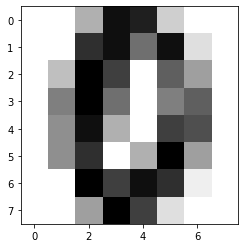

In [38]:
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary)
plt.show()

### 使用sklearn类库对数据进行测试集和训练集的划分

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

# 获取KNN实例
kNN_classfier = KNeighborsClassifier(n_neighbors = 3)
kNN_classfier.fit(X_train,y_train) # fit方法有返回值，直接包含在KNN实例中

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

### 计算分类准确度

In [41]:
# 计算预测的结果，并存放在y_pridict
y_predict = kNN_classfier.predict(X_test)
y_predict

array([2, 0, 3, 5, 1, 7, 0, 3, 1, 7, 3, 0, 1, 2, 3, 7, 3, 1, 5, 5, 2, 0,
       9, 0, 1, 4, 2, 9, 1, 3, 7, 2, 9, 5, 5, 0, 2, 9, 5, 0, 4, 3, 9, 3,
       1, 4, 3, 0, 9, 4, 9, 2, 4, 6, 4, 9, 3, 4, 1, 6, 9, 8, 0, 4, 2, 8,
       2, 5, 2, 6, 5, 5, 0, 1, 3, 3, 5, 0, 0, 0, 1, 7, 3, 5, 5, 3, 4, 4,
       4, 3, 9, 0, 7, 4, 8, 4, 8, 4, 1, 1, 5, 9, 5, 7, 7, 9, 1, 7, 8, 4,
       3, 6, 6, 8, 1, 1, 7, 1, 6, 7, 7, 9, 8, 6, 0, 9, 7, 7, 4, 8, 6, 8,
       6, 1, 4, 3, 1, 8, 7, 9, 9, 5, 5, 4, 3, 0, 5, 6, 3, 7, 3, 6, 8, 7,
       1, 3, 0, 5, 2, 8, 6, 1, 3, 9, 4, 8, 9, 0, 5, 9, 9, 1, 2, 4, 8, 4,
       5, 4, 6, 5, 2, 3, 0, 0, 1, 9, 7, 1, 3, 7, 7, 0, 2, 7, 9, 6, 6, 6,
       7, 8, 0, 1, 3, 9, 6, 1, 7, 8, 2, 5, 7, 2, 8, 9, 8, 3, 7, 6, 0, 4,
       8, 4, 2, 5, 8, 1, 3, 8, 0, 4, 2, 1, 8, 4, 0, 6, 6, 1, 3, 3, 2, 2,
       3, 5, 8, 1, 8, 8, 1, 8, 9, 4, 2, 3, 5, 0, 8, 5, 4, 8, 5, 3, 4, 5,
       3, 5, 6, 4, 2, 6, 8, 3, 4, 6, 3, 5, 7, 6, 9, 7, 3, 3, 7, 6, 8, 4,
       6, 5, 4, 5, 6, 7, 0, 8, 4, 5, 8, 1, 2, 5, 8,

In [42]:
# 使用预测成功的总个数 除以 预测的总的个数
sum(y_predict == y_test) / len(y_test)

0.9977777777777778

### sklearn中的预测准确度：accuracy_score

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 666)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

# 获取KNN实例
kNN_classfier = KNeighborsClassifier(n_neighbors = 3)
kNN_classfier.fit(X_train,y_train) # fit方法有返回值，直接包含在KNN实例中

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [45]:
y_predict = kNN_classfier.predict(X_test)

In [46]:


# 使用sklearn中的库来计算分类准确度
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict)

0.9844444444444445

## 超参数

> 在使用KNN的时候，需要传入一个认为规定的参数K 值（在sklearn中该参数是n_neighbors）,这个K值，具体传入什么值是最好的呢？这就涉及到了机器学习领域中，超参数的问题，什么是超参数，也就是在我们运行机器学习算法之前，需要指定的参数，kNN中的K值就是一个典型的超参数

**超参数和模型参数的区别**
>超参数是在算法运行之前就需要决定的参数，而模型参数是算法在学习过程中习得的参数，具体在KNN算法中，没有模型参数，K是典型的超参数。算法工程师调参，调的就是超参数。

**如何寻找好的超参数？**
> 领域知识；经验数字（一般的机器学习库中，默认值）；实验搜索

In [47]:
import numpy as np
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [48]:
X.shape

(1797, 64)

In [49]:
y.shape

(1797,)

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 666)

In [51]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [52]:
# 直接对预测的结果进行准确度的计算
knn.score(X_test,y_test)

0.9844444444444445

### 计算最好的K，K是一个超参数

In [53]:
best_score = 0.0
best_k = -1
for k in range(1,11):
    knn_clf = KNeighborsClassifier(n_neighbors = k)
    knn_clf.fit(X_train,y_train)
    score = knn_clf.score(X_test,y_test)
    if score > best_score:
        best_k = k
        best_score = score
print("best_k = ", best_k)
print("best_score = ",best_score)

best_k =  5
best_score =  0.9866666666666667


> 如果K值在我们寻找范围的边界的时候，我们需要继续进行超过边界的寻找

### KNN中的另外一个超参数：权重
**情况一：**
![1](img/isea7.jpg)
> 此时是普通的KNN算法，不考虑距离，蓝色获胜

**情况二：**
![2](img/isea6.jpg)
>此时，考虑权重，权重为距离的倒数，红色获胜

**情况三：**
![权重的参数](img/isea5.jpg)

>假设我们这里有三种分类，如果我们没有权重这个参数的话，对于蓝色点，每一个分类的票数都是一样的，所以此时的办法是随机一个分类，但是如果我们有权重的话，就可以很好的解决平票的问题。

同时在sk-learn中，weight也是一个超参数，该超参数的默认值是uniform，也即不考虑距离的权重。如果weight为distance，也就是考虑距离的权重。

### 考虑距离（距离作为权重）

In [54]:
best_method = ""
best_score = 0.0
best_k = -1
for method in ["uniform","distance"]:
    for k in range(1,11):
        knn_clf = KNeighborsClassifier(n_neighbors=k,weights = method)
        knn_clf.fit(X_train,y_train)
        score = knn_clf.score(X_test,y_test)
        if score > best_score:
            best_k = k
            best_score = score
            best_method = method
print("best_method = " , best_method)
print("best_k = ", best_k)
print("best_score = ",best_score)

best_method =  uniform
best_k =  5
best_score =  0.9866666666666667


#### 对于上面结果的解释：
由输出的结果可以发现（搜索之后），不考虑权重，而且k等于5的时候，可以获取最大的评分。

## 更多的关于距离的定义

### 欧拉距离：
![欧拉公式](img/isea2.png)

### 曼哈顿距离：
![曼哈顿距离](img/isea8.jpg)
> 两个点在每一个维度上，差值的绝对值的和，上图中，红色黄色蓝色，都是曼哈顿距离，蓝色是欧拉距离

欧拉距离中的小括号是可以换成是绝对值的，那么曼哈顿距离和欧拉距离就可以整理成统一格式，也即明科夫斯基距离的形式。此时p就是一个参数。

### 明可夫斯基距离
![明科夫斯基距离](img/isea9.png)

**此时我们在KNN中就会获得另外一个超参数p，如果使用不同的距离，也会得到不同的结果**

### 搜索明科夫斯基距离相对应的p
也即在sk-learn中KNN的另外一个超参数，默认值是2，也即距离取的是欧拉距离，下面使用网格搜索的方式来寻找最优的p值。

In [55]:
best_p = -1
best_score = 0.0
best_k = -1

for k in range(1,11):
    for p in range(1,6):
        knn_clf = KNeighborsClassifier(n_neighbors=k,weights = "distance",p = p)
        knn_clf.fit(X_train,y_train)
        score = knn_clf.score(X_test,y_test)
        if score > best_score:
            best_k = k
            best_score = score
            best_p = p
print("best_p = " , best_p)
print("best_k = ", best_k)
print("best_score = ",best_score)

# p这个参数，在KNN中，只有weight这个参数取值为distance的时候，p才有意义。也即超参数
# 之间存在着关联关系。

best_p =  2
best_k =  5
best_score =  0.9866666666666667


在sk-learn中，专门提供了网格搜索的工具
### Grid Search

In [62]:
# 定义搜索参数range(1,11) 不包含11
param_grid = [
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1,11)] 
    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1,11)],
        'p':[i for i in range(1,6)]
    }
]

In [63]:
knn_clf = KNeighborsClassifier()

# CV : 交叉验证
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(knn_clf,param_grid)

# 针对训练数据集，来寻找最佳的模型参数,这个过程是比较耗时的，可以使用%%time计时
grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [64]:
# 获取网格搜索搜索到的最佳分类器和与之对应的参数
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=3,
           weights='distance')

In [65]:
# 获取当前的准确度
grid_search.best_score_

0.9866369710467706

In [66]:
# 获取网格搜索的时候，我们传入的参数的最佳参数
grid_search.best_params_

{'n_neighbors': 5, 'p': 3, 'weights': 'distance'}

In [67]:
knn_clf = grid_search.best_estimator_
knn_clf.score(X_test,y_test)

0.9822222222222222

在进行网格搜索的时候，是生成多个分类器，然后比较，这个过程是可以并行的。所以

In [68]:
# n_jobs 来指定核数 verbose 来输出提示信息
grid_search = GridSearchCV(knn_clf,param_grid,n_jobs=-1,verbose=2)

## 数据归一化

![isea10](img/isea10.jpg)

> 数据归一化是为了避免样本之间的距离被某个特征所主导;如上图中样本之间的距离被发现时间所主导。

解决的方法：将所有的数据映射到同样的一个尺度，最简单的就是最值归一化：把所有的数据映射到0-1之间：

### 最值归一化：
![isea10](img/isea11.jpg)
> 最值归一化（normalization）：使用于分布有明显边界的情况，比如学生的成绩，就是有明显的边界，最小值就是0分，最大值就是100分；颜色的像素点。

### 均值方差归一化
> standardization ,把所用的数据归一到均值为0，方差为1的分布中，适用于数据分布没有明显的边界；有可能存在极端的数据值。

![isea10](img/isea12.jpg) 
> (每一个特征值 - 方差) 除以 特征值的方差

## 数据归一化处理

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 最值归一化Normalization

In [4]:
x = np.random.randint(0,100,size = 100)
x

array([84, 39,  5, 96, 95, 87, 17, 64, 22, 32, 99, 51, 84, 11, 63, 65, 78,
       44,  5, 74, 90, 53, 87, 56, 18, 41,  0, 98, 37, 43, 28,  5, 54, 40,
       60, 93, 84, 82, 88, 17, 14, 15, 80, 33, 35, 93, 45, 87, 12, 29,  1,
       23, 79, 47, 53, 89, 41, 52,  4, 47, 25, 33, 19,  8,  1, 41, 68, 65,
       27, 61, 65, 74, 65, 18, 35, 76, 94,  2, 28, 52, 79, 58,  4, 16, 85,
       99, 11, 72, 85, 51, 18, 37, 89, 35, 57, 88, 80, 50, 54,  0])

In [8]:
 # 对x进行最值归一化
(x - np.min(x)) / (np.max(x) - np.min(x))

array([0.84848485, 0.39393939, 0.05050505, 0.96969697, 0.95959596,
       0.87878788, 0.17171717, 0.64646465, 0.22222222, 0.32323232,
       1.        , 0.51515152, 0.84848485, 0.11111111, 0.63636364,
       0.65656566, 0.78787879, 0.44444444, 0.05050505, 0.74747475,
       0.90909091, 0.53535354, 0.87878788, 0.56565657, 0.18181818,
       0.41414141, 0.        , 0.98989899, 0.37373737, 0.43434343,
       0.28282828, 0.05050505, 0.54545455, 0.4040404 , 0.60606061,
       0.93939394, 0.84848485, 0.82828283, 0.88888889, 0.17171717,
       0.14141414, 0.15151515, 0.80808081, 0.33333333, 0.35353535,
       0.93939394, 0.45454545, 0.87878788, 0.12121212, 0.29292929,
       0.01010101, 0.23232323, 0.7979798 , 0.47474747, 0.53535354,
       0.8989899 , 0.41414141, 0.52525253, 0.04040404, 0.47474747,
       0.25252525, 0.33333333, 0.19191919, 0.08080808, 0.01010101,
       0.41414141, 0.68686869, 0.65656566, 0.27272727, 0.61616162,
       0.65656566, 0.74747475, 0.65656566, 0.18181818, 0.35353

In [13]:
X = np.random.randint(0,100,size = (50,2))
X[:10,:]

array([[ 7, 21],
       [82, 19],
       [ 3, 66],
       [79, 87],
       [77, 31],
       [47, 54],
       [56, 31],
       [74, 16],
       [33, 78],
       [ 4, 83]])

In [15]:
X = np.array(X,dtype = float)
X[:10,:]

array([[ 7., 21.],
       [82., 19.],
       [ 3., 66.],
       [79., 87.],
       [77., 31.],
       [47., 54.],
       [56., 31.],
       [74., 16.],
       [33., 78.],
       [ 4., 83.]])

In [17]:
# 将数据的第0列数据，进行最值归一化，
X[:,0] = (X[:,0] - np.min(X[:,0])) / (np.max(X[:,0]) - np.min(X[:,0]))

# 将数据的第1列数据，进行最值归一化，
X[:,1] = (X[:,1] - np.min(X[:,1])) / (np.max(X[:,1]) - np.min(X[:,1]))

In [18]:
X[:10,:]

array([[0.07216495, 0.21212121],
       [0.84536082, 0.19191919],
       [0.03092784, 0.66666667],
       [0.81443299, 0.87878788],
       [0.79381443, 0.31313131],
       [0.48453608, 0.54545455],
       [0.57731959, 0.31313131],
       [0.7628866 , 0.16161616],
       [0.34020619, 0.78787879],
       [0.04123711, 0.83838384]])

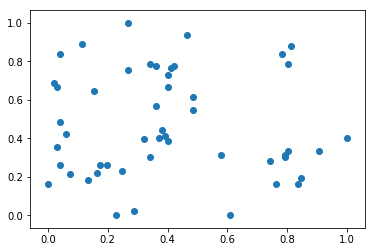

In [19]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [23]:
# 查看第0列数据的均值
np.mean(X[:,0])

0.3997938144329896

In [22]:
# 查看第1列数据的方差：
np.std(X[:,0])

0.2816549938330015

In [24]:
np.mean(X[:,1])

0.46767676767676775

In [25]:
np.std(X[:,1])

0.26675274092947654

### 均值方差归一化

In [46]:
X2 = np.random.randint(0,100,(50,2))
X2 = np.array(X2,dtype = float)
X2[:10,:]

array([[53., 31.],
       [67., 85.],
       [47., 85.],
       [99., 88.],
       [87., 74.],
       [ 4., 21.],
       [58., 35.],
       [35., 53.],
       [67., 43.],
       [82.,  8.]])

In [52]:
X2[:,0] = (X2[:,0] - np.mean(X2[:,0])) / np.std(X2[:,0])

In [53]:
X2[:,1] = (X2[:,1] - np.mean(X2[:,1])) / np.std(X2[:,1])
X2[:10,:]

array([[-0.14295833, -0.48985903],
       [ 0.33815144,  1.23905519],
       [-0.34914823,  1.23905519],
       [ 1.43783091,  1.33510598],
       [ 1.02545111,  0.88686896],
       [-1.82684252, -0.81002833],
       [ 0.02886659, -0.36179131],
       [-0.76152804,  0.21451343],
       [ 0.33815144, -0.10565587],
       [ 0.85362619, -1.22624842]])

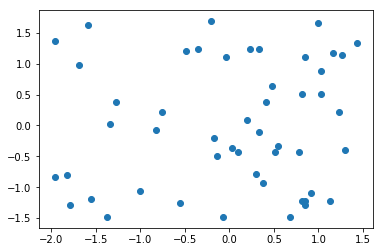

In [54]:
plt.scatter(X2[:,0],X2[:,1])
plt.show()

In [55]:
np.mean(X2[:,0])

1.509903313490213e-16

In [56]:
np.std(X2[:,0])

1.0

### 对测试数据集的归一化（feature scaling）
一般地，测试数据是模拟真实的环境，但是真实环境很有可能无法得到所有的测试数据的方差和均值，（比如鸢尾花的真实环境中，只是来了一只鸢尾花，对其进行预测）所以测试数据集的归一化应该使用训练数据集的 均值和方差

> (x_test - mean_test) / std_train

## sklearn 中的scaler
**sklearn 中的scaler类的使用流程**
![isea10](img/isea13.jpg)

In [101]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()

In [102]:
X = iris.data
y = iris.target

In [103]:
X[:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target, test_size = 0.2 ,random_state = 666)

### sklearn中的StandardScaler

In [105]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [106]:
# 获取数据的均值
standardScaler.mean_ # 带有_的变量，不是用户传入的变量 ，而是用户传入的变量计算出来的变量

array([5.83416667, 3.0825    , 3.70916667, 1.16916667])

In [107]:
# 获取数据的方差
standardScaler.scale_ 

array([0.81019502, 0.44076874, 1.76295187, 0.75429833])

In [108]:
# 对数据进行归一化处理
X_train = standardScaler.transform(X_train)
X_train[:10,:]

array([[-0.90616043,  0.94720873, -1.30982967, -1.28485856],
       [-1.15301457, -0.18717298, -1.30982967, -1.28485856],
       [-0.16559799, -0.64092567,  0.22169257,  0.17345038],
       [ 0.45153738,  0.72033239,  0.95909217,  1.49918578],
       [-0.90616043, -1.3215547 , -0.40226093, -0.0916967 ],
       [ 1.43895396,  0.2665797 ,  0.56203085,  0.30602392],
       [ 0.3281103 , -1.09467835,  1.07253826,  0.30602392],
       [ 2.1795164 , -0.18717298,  1.63976872,  1.2340387 ],
       [-0.78273335,  2.30846679, -1.25310662, -1.4174321 ],
       [ 0.45153738, -2.00218372,  0.44858475,  0.43859746]])

In [109]:
X_test_standard = standardScaler.transform(X_test)
X_test_standard[:10,:]

array([[-0.28902506, -0.18717298,  0.44858475,  0.43859746],
       [-0.04217092, -0.64092567,  0.78892303,  1.63175932],
       [-1.0295875 , -1.77530738, -0.2320918 , -0.22427024],
       [-0.04217092, -0.86780201,  0.78892303,  0.96889162],
       [-1.52329579,  0.03970336, -1.25310662, -1.28485856],
       [-0.41245214, -1.3215547 ,  0.16496953,  0.17345038],
       [-0.16559799, -0.64092567,  0.44858475,  0.17345038],
       [ 0.82181859, -0.18717298,  0.84564608,  1.10146516],
       [ 0.57496445, -1.77530738,  0.39186171,  0.17345038],
       [-0.41245214, -1.09467835,  0.39186171,  0.04087684]])

In [110]:
# 使用KNN来进行试验
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [113]:
# 进行预测的时候，必须要使用归一化后的数据进行相关的预测
knn.score(X_test_standard,y_test)

1.0

In [115]:
knn.score(X_test,y_test)

0.3333333333333333

## 关于KNN的总结：
* 主要用来解决分类问题，天然的可以解决多分类的问题
* 思想简单，效果却很好
* 使用KNN还可以解决回归问题（使用K个最近的点的平均值（或者是加权平均）来作为预测值）
![](img/isea14.jpg)
> 在sklearn中，有KNeighborsRegressor，即KNN来解决回归问题
* KNN的缺点1是：效率低下，如果有m个样本，n个特征，则每次预测一个新的数据，需要O（m*n），该点和所有的m样本之间的距离，每计算一个距离的时间复杂度是O(n)，优化的手段是使用树结构，KD-Tree，或者是Ball-Tree
* KNN的缺点2：高度数据相关，假设在预测数据的周边存在着错误的数据
* KNN的缺点3：预测的结果不具有可解释性
* KNN的缺点4：维数灾难，也即随着维度的增加，看似近似的两个点之间距离越来越大，解决的办法就是降维处理
![](img/isea15.jpg)
* 机器学习的流程：
![](img/isea16.jpg)